In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Embedding, LSTM, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist, imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import RMSprop, SGD

import argparse

func1


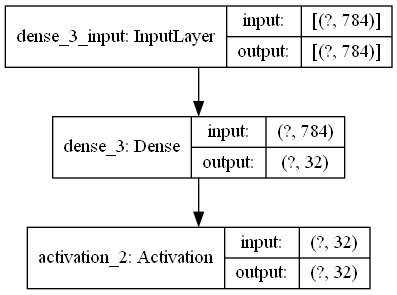

In [6]:
# def func1():
print("func1")
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
plot_model(model, to_file='keras-demo1.png')
plot_model(model,show_shapes=True, to_file='keras-demo2.png')
# func1()

In [ ]:
def func2():
    x = np.arange(-5.0, 5.0, 0.02)
    #y = np.sin(x)
    y=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

    plt.xlabel('x')
    plt.ylabel('y tanh(x)')
    plt.title('tanh')

    plt.plot(x, y)
    plt.show()

def func3():
    x = np.arange(-5.0, 5.0, 0.02)
    #y = np.sin(x)
    y=1/(1+np.exp(-x))

    plt.xlabel('x')
    plt.ylabel('y sigmoid(x)')
    plt.title('sigmoid')

    plt.plot(x, y)
    plt.show()

def relu(x):
    if x > 0:
        return x
    else:
        return 0

def func4():
    x = np.arange(-5.0, 5.0, 0.02)
    y=[]

    for i in x:
        yi=relu(i)
        y.append(yi)

    plt.xlabel('x')
    plt.ylabel('y relu(x)')
    plt.title('relu')

    plt.plot(x, y)
    plt.show()

def leakyrelu(x):
    if x > 0:
        return x
    else:
        return x*0.1

def func5():
    x = np.arange(-5.0, 5.0, 0.02)
    y=[]

    for i in x:
        yi=leakyrelu(i)
        y.append(yi)

    plt.xlabel('x')
    plt.ylabel('y leakyrelu(x)')
    plt.title('leakyrelu')

    plt.plot(x, y)
    plt.show()

def func6():
    batch_size = 128
    num_classes = 10
    epochs = 20
    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    plot_model(model, show_shapes=True, to_file='keras-mlp.png')

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

def func7():
    batch_size = 128
    num_classes = 10
    epochs = 12

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    model.summary()
    plot_model(model, show_shapes=True, to_file='keras-cnn.png')

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

def func8():
    max_features = 20000
    maxlen = 80
    batch_size = 32

    print('Loading data...')
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
    print(len(x_train), 'train sequences')
    print(len(x_test), 'test sequences')

    print('Pad sequences (samples x time)')
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)

    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    plot_model(model, show_shapes=True, to_file='keras-lstm.png')

    print('Train...')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test))
    score, acc = model.evaluate(x_test, y_test,
                                batch_size=batch_size)
    print('Test score:', score)
    print('Test accuracy:', acc)

def maidou_gan():
    def gan_generator_model():
        model = Sequential()
        model.add(Dense(input_dim=200, units=256))
        model.add(Activation('relu'))
        model.add(Dense(28*28*1))
        model.add(Activation('sigmoid'))

        model.add(Reshape((28, 28, 1), input_shape=(28*28*1,)))

        plot_model(model, show_shapes=True, to_file='keras-gan-generator_model.png')
        return model

    def gan_discriminator_model():
        model = Sequential()

        model.add(Reshape((28*28*1,), input_shape=(28, 28, 1)))
        model.add(Dense(units=256))
        model.add(Activation('relu'))
        model.add(Dense(1))
        model.add(Activation('sigmoid'))

        plot_model(model, show_shapes=True, to_file='keras-gan-discriminator_model.png')
        return model

    def gan_generator_containing_discriminator(g, d):
        model = Sequential()
        model.add(g)
        d.trainable = False
        model.add(d)

        plot_model(model, show_shapes=True, to_file='keras-gan-gan_model.png')
        return model

    def gan_combine_images(generated_images):

        #print(generated_images.shape[0]

        num = generated_images.shape[0]
        width = int(math.sqrt(num))
        height = int(math.ceil(float(num) / width))
        shape = generated_images.shape[1:3]
        image = np.zeros((height * shape[0], width * shape[1]),
                         dtype=generated_images.dtype)
        for index, img in enumerate(generated_images):
            i = int(index / width)
            j = index % width
            image[i * shape[0]:(i + 1) * shape[0], j * shape[1]:(j + 1) * shape[1]] = \
                img[:, :, 0]
        return image

    def gan_train(BATCH_SIZE):
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        #把像素点转化成小数
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = X_train[:, :, :, None]
        X_test = X_test[:, :, :, None]




        print(X_train.shape
        # X_train = X_train.reshape((X_train.shape, 1) + X_train.shape[1:])
        d = gan_discriminator_model()
        g = gan_generator_model()
        d_on_g = gan_generator_containing_discriminator(g, d)
        d_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
        g_optim = SGD(lr=0.0005, momentum=0.9, nesterov=True)
        g.compile(loss='binary_crossentropy', optimizer='SGD')
        d_on_g.compile(loss='binary_crossentropy', optimizer=g_optim)
        d.trainable = True
        d.compile(loss='binary_crossentropy', optimizer=d_optim)
        for epoch in range(100):
            print("Epoch is", epoch)
            print("Number of batches", int(X_train.shape[0] / BATCH_SIZE))
            for index in range(int(X_train.shape[0] / BATCH_SIZE)):
                noise = np.random.uniform(-1, 1, size=(BATCH_SIZE, 200))
                image_batch = X_train[index * BATCH_SIZE:(index + 1) * BATCH_SIZE]
                generated_images = g.predict(noise, verbose=0)
                if index % 200 == 0:
                    image = gan_combine_images(generated_images)
                    #之前为了处理方便 像素都是0-1的小数 这里需要还原成整数
                    image = image * 127.5 + 127.5
                    # 调试阶段不生成图片
                    Image.fromarray(image.astype(np.uint8)).save("gan/"+str(epoch)+"_"+str(index)+".png")
                X = np.concatenate((image_batch, generated_images))
                y = [1] * BATCH_SIZE + [0] * BATCH_SIZE
                d_loss = d.train_on_batch(X, y)
                print("batch %d d_loss : %f" % (index, d_loss))
                noise = np.random.uniform(-1, 1, (BATCH_SIZE, 200))
                d.trainable = False
                g_loss = d_on_g.train_on_batch(noise, [1] * BATCH_SIZE)
                d.trainable = True
                print("batch %d g_loss : %f" % (index, g_loss))
                if index % 100 == 0:
                    g.save_weights('gan_generator', True)
                    d.save_weights('gan_discriminator', True)

    print("maidou")
    gan_train(BATCH_SIZE=128)

if __name__ == '__main__':
    maidou_gan()